# Proyecto - Gráficas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## Obtención de los datos

In [6]:
#Datos de dia
data_dia_total = pd.read_csv('./Datos/MiBici/data_dia_total.csv', index_col=0)
data_dia_M = pd.read_csv('./Datos/MiBici/data_dia_M.csv', index_col=0)
data_dia_F = pd.read_csv('./Datos/MiBici/data_dia_F.csv', index_col=0)

#Datos de semana
data_semana = pd.read_csv('./Datos/MiBici/data_semana.csv', index_col=0)

#Datos de mes
data_mes_total = pd.read_csv('./Datos/MiBici/data_mes_total.csv', index_col=0)
data_mes_M = pd.read_csv('./Datos/MiBici/data_mes_M.csv', index_col=0)
data_mes_F = pd.read_csv('./Datos/MiBici/data_mes_F.csv', index_col=0)

#Datos de año
data_año = pd.read_csv('./Datos/MiBici/data_año.csv', index_col=0)

#Datos de clusterización
data_cluster = pd.read_csv('./Datos/MiBici/cluster_1.csv', index_col=0)

## Gráficas

### Gráficas de día

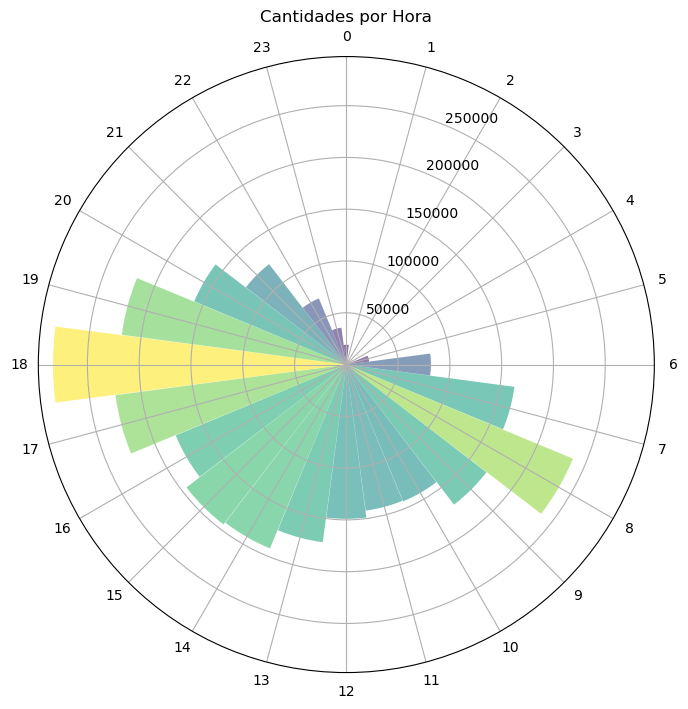

In [10]:
#Crear los ángulos para el gráfico polar (uno para cada hora)
angulos = np.linspace(0, 2 * np.pi, 24, endpoint=False).tolist()

#Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

#Cambiar el color de las barras según su altura
norm = plt.Normalize(vmin=min(data_dia_total['cantidad_NA']), vmax=max(data_dia_total['cantidad_NA']))
colors = plt.get_cmap('viridis')(norm(data_dia_total['cantidad_NA']))

#Crear la gráfica de barras
ax.bar(angulos, data_dia_total['cantidad_NA'], color=colors, width=0.26, bottom=0.2, alpha=0.6)

#Ajustar angulos
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Etiquetas de las horas (de 0 a 23)
ax.set_xticks(angulos)
ax.set_xticklabels([str(i) for i in data_dia_total['horas']])

# Título de la gráfica
plt.title("Cantidades por Hora")

# Mostrar la gráfica
plt.show()

### Gráficas de clusterización

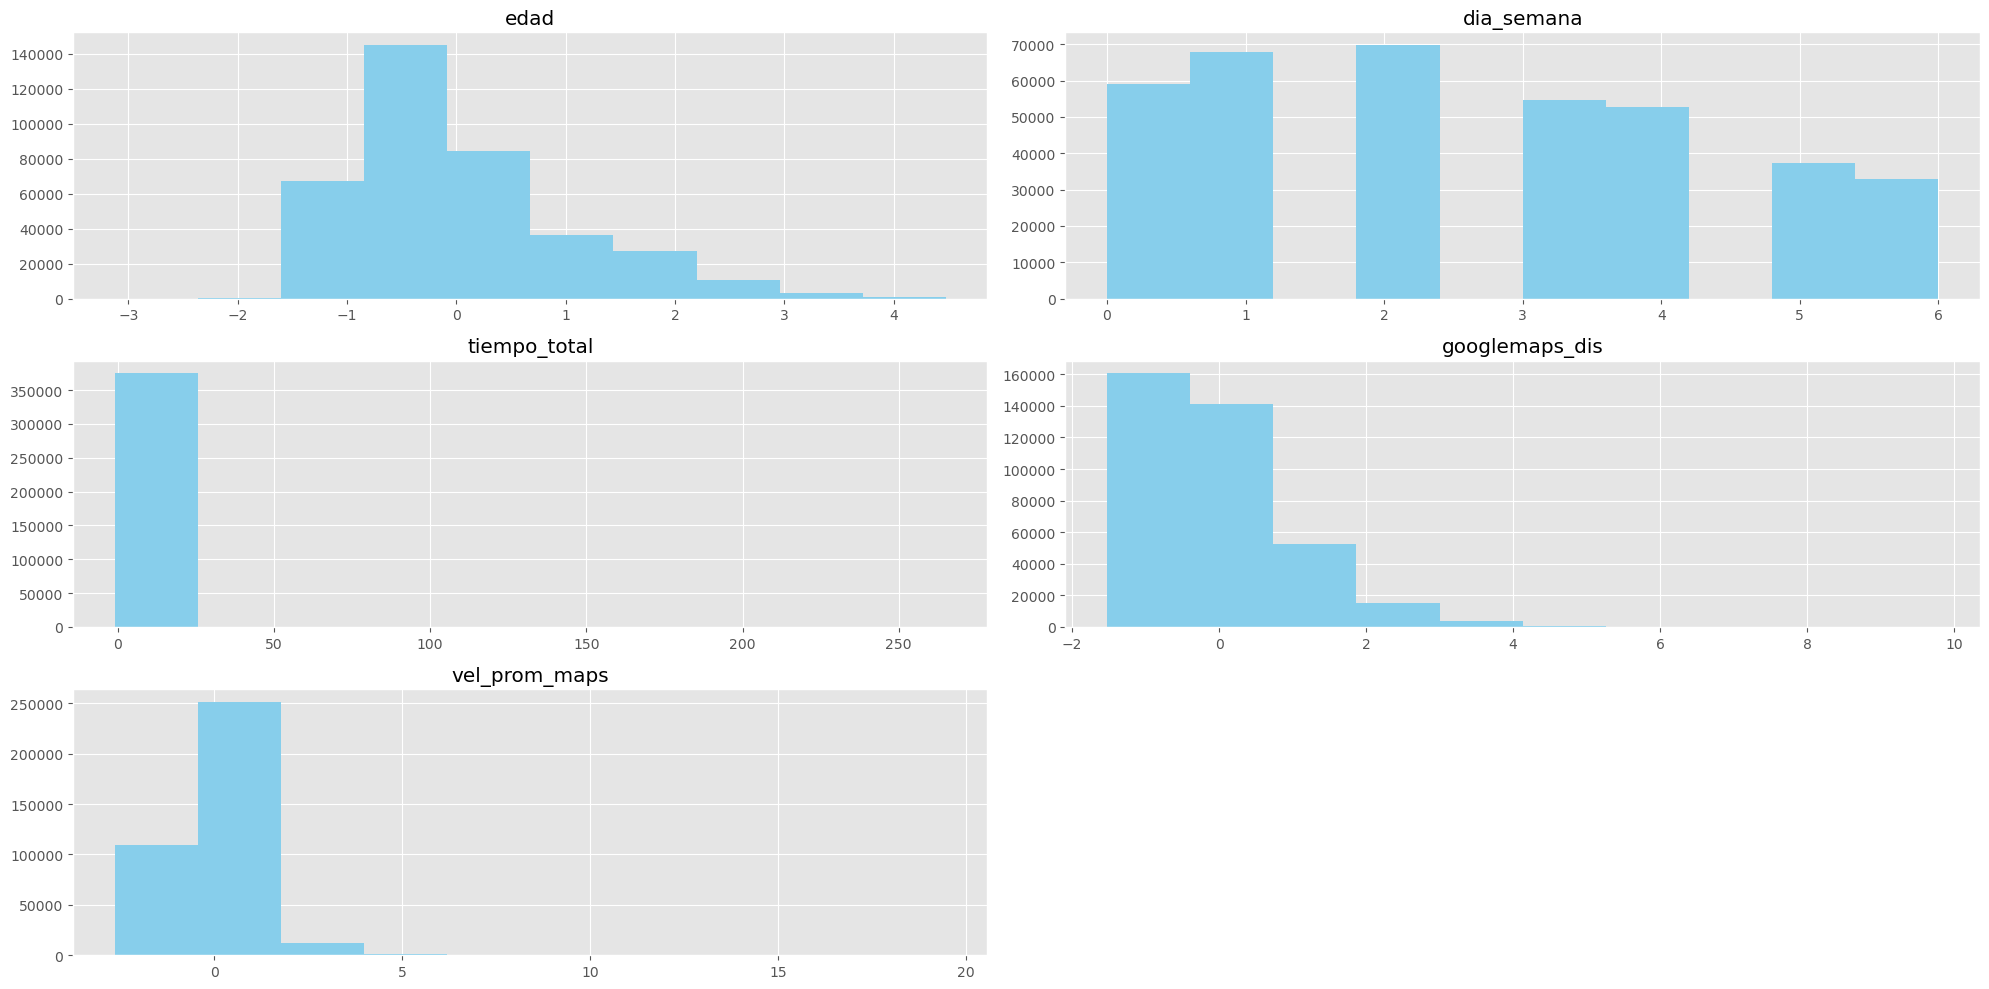

In [47]:
#Mostrar los histogramas del DataFrame
plt.style.use('ggplot')
data_cluster[['edad', 'dia_semana', 'tiempo_total', 'googlemaps_dis', 'vel_prom_maps']].hist(color='skyblue', grid=True, figsize=(20, 10));
plt.tight_layout()
plt.savefig('./Imagenes/histogramas.png')

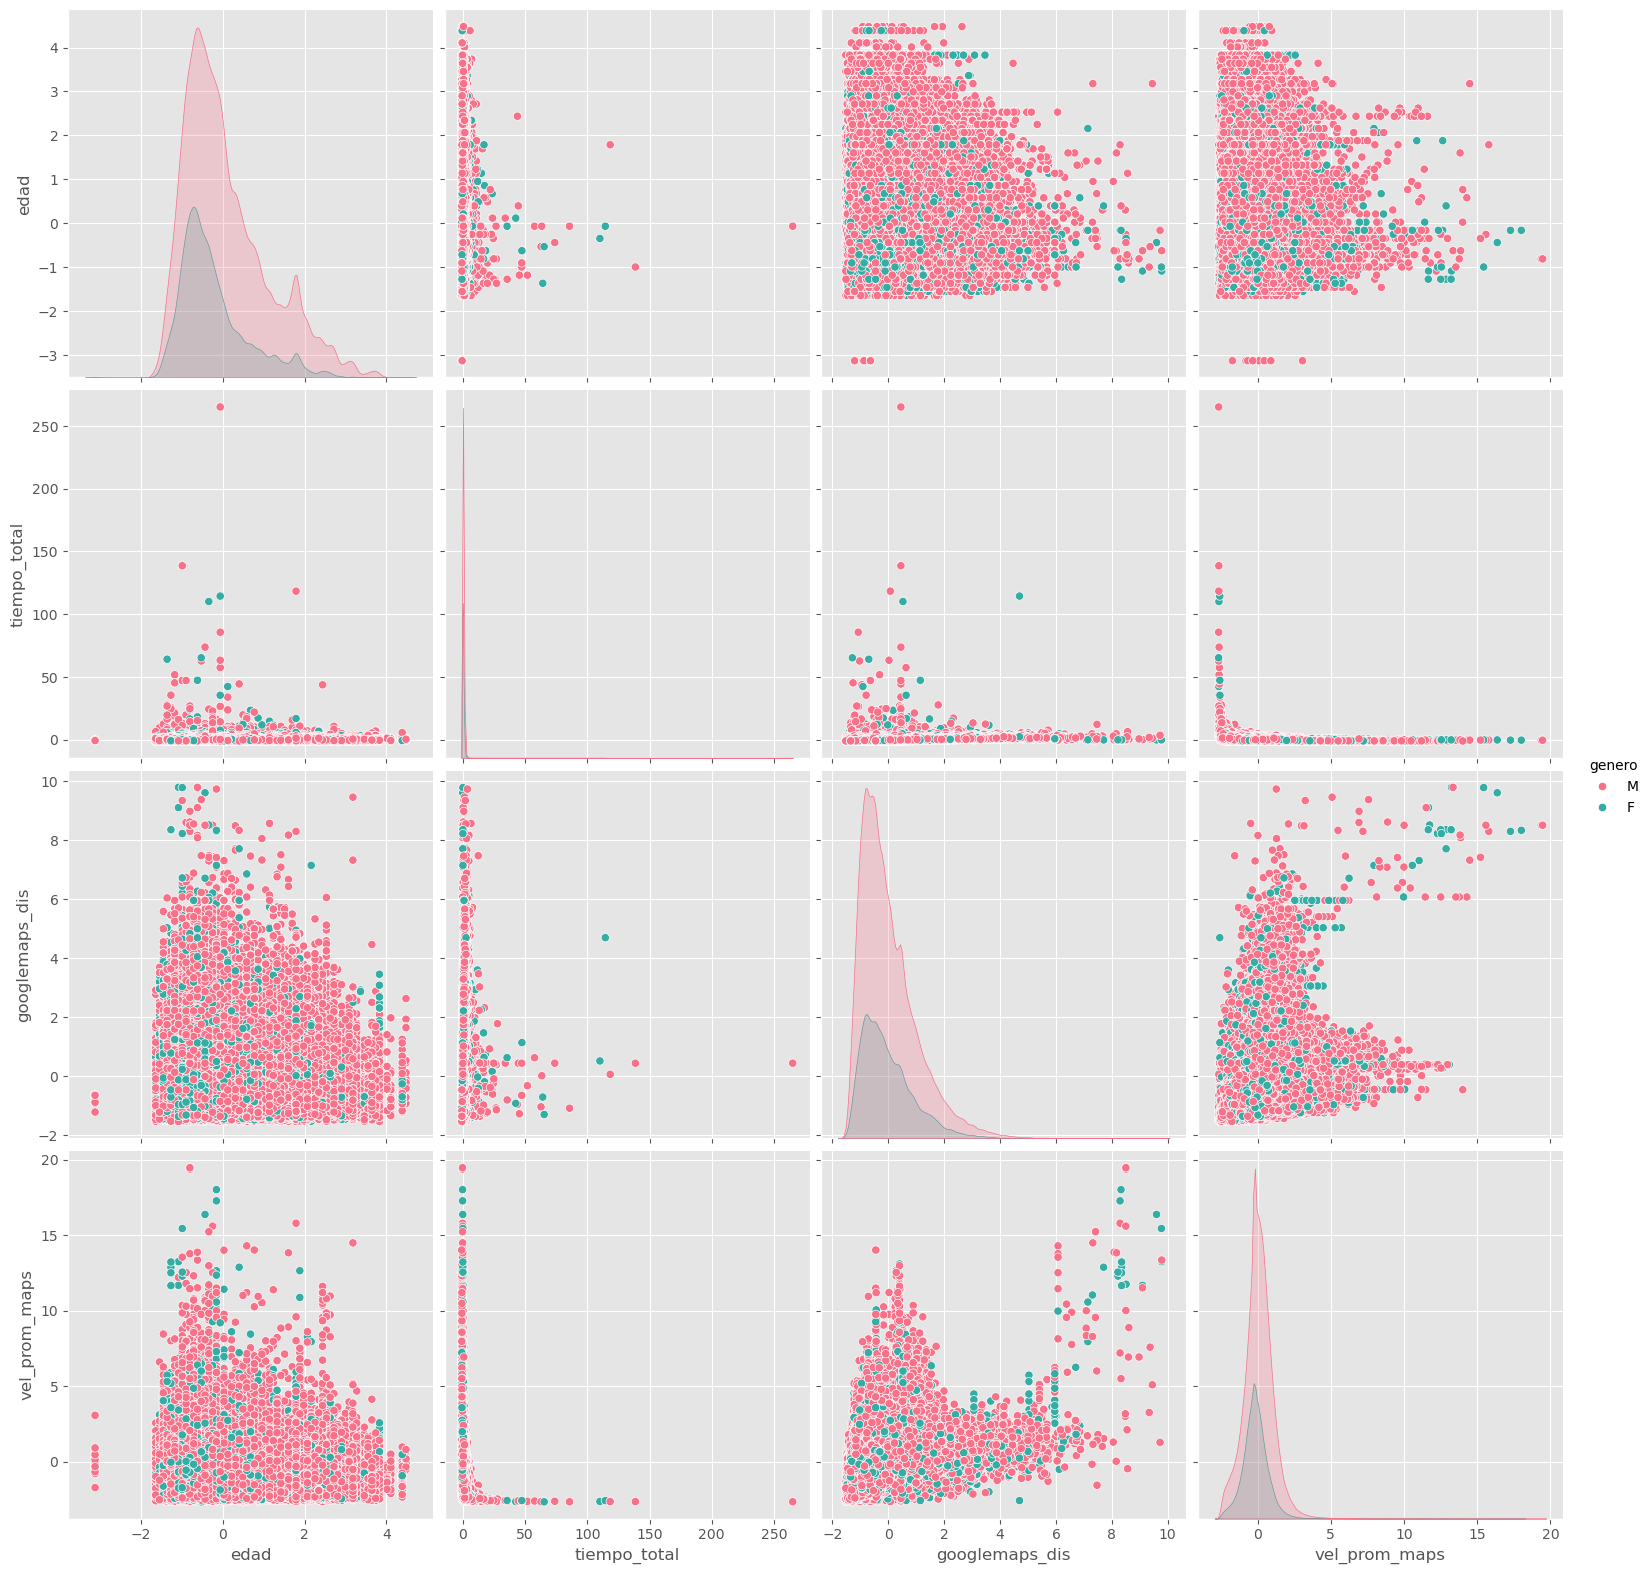

In [49]:
#Eliminación de las Advertencias (Warnings) de Matplotlib
warnings.filterwarnings('ignore')

#Gráfico de las columnas 'edad', 'tiempo_total', 'googlemaps_dis' y 'vel_prom_maps' del DataFrame
sns.pairplot(data_cluster, hue = 'genero', height = 4, vars = ['edad', 'tiempo_total', 'googlemaps_dis', 'vel_prom_maps'], kind = 'scatter', palette = 'husl')
plt.savefig('./Imagenes/columnas.png')
plt.show();

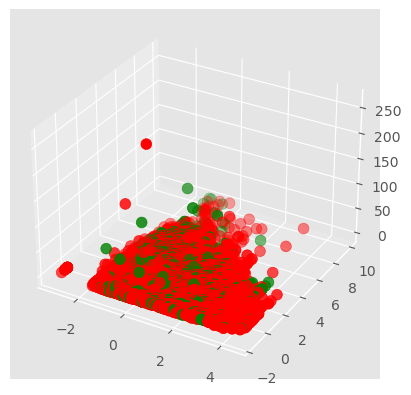

In [50]:
#Definición de los valores X e y
X = np.array(data_cluster[['edad','googlemaps_dis','tiempo_total']])
y = np.array(data_cluster['genero'])

#Gráfico 3D con los valores X e y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ['red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar = []
for row in y:
    asignar.append(colores[0 if row=='M' else 1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
plt.savefig('./Imagenes/grafico3D_1.png')
plt.show();

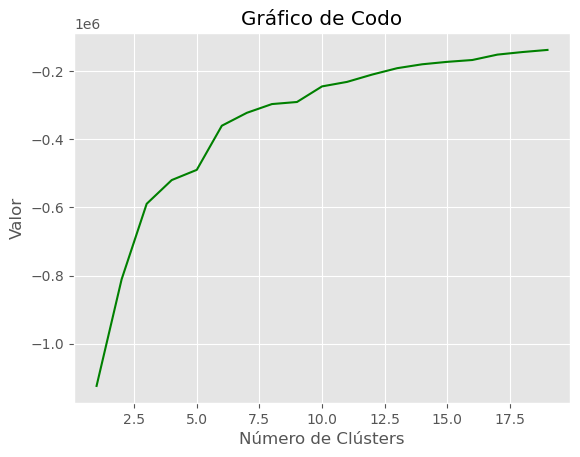

In [31]:
#Determinación del valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

#Gráfico de Codo
plt.plot(Nc, score, color='green')
plt.xlabel('Número de Clústers')
plt.ylabel('Valor')
plt.title('Gráfico de Codo')
plt.show();

In [33]:
#Aplicación del Modelo K-Means
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
print("Los valores de los centroides son: \n", centroids)

Los valores de los centroides son: 
 [[-4.58942405e-01 -6.67013373e-01 -4.35781609e-01]
 [-4.28336368e-01  4.84647184e-01  3.36838303e-01]
 [-3.01524976e-01  2.21500128e-01  9.77844303e+01]
 [-6.84699739e-02  2.14680614e+00  1.11574383e+00]
 [ 1.57937252e+00 -3.00121799e-01 -1.01081386e-01]]


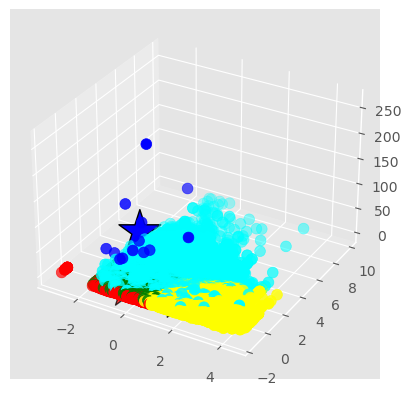

In [51]:
#Etiquetas de cada punto de los datos
labels = kmeans.predict(X)

#Determinación de los centroides
C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan','yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

#Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', edgecolor='black', linewidth=1, c = colores, s = 1000)
plt.savefig('./Imagenes/grafico3D_2.png')
plt.show();

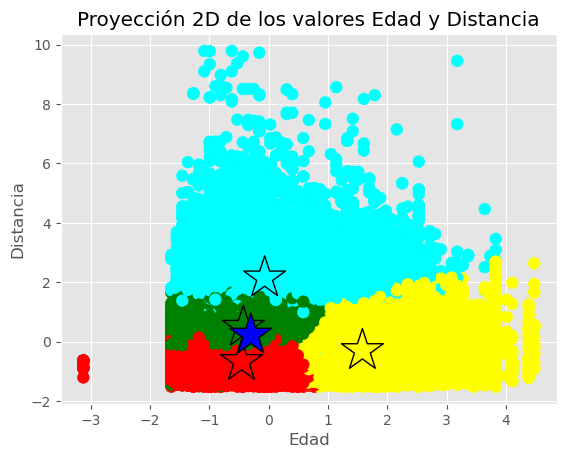

In [52]:
#Proyección a 2D con 'edad' y 'googlemaps_dis'
f1 = data_cluster['edad'].values
f2 = data_cluster['googlemaps_dis'].values

#Gráfico de Proyección 2D
plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 1], marker = '*', edgecolor='black', linewidth=1, c = colores, s = 1000)
plt.xlabel("Edad")
plt.ylabel("Distancia")
plt.title("Proyección 2D de los valores Edad y Distancia")
plt.savefig('./Imagenes/grafico2D_1.png')
plt.show();

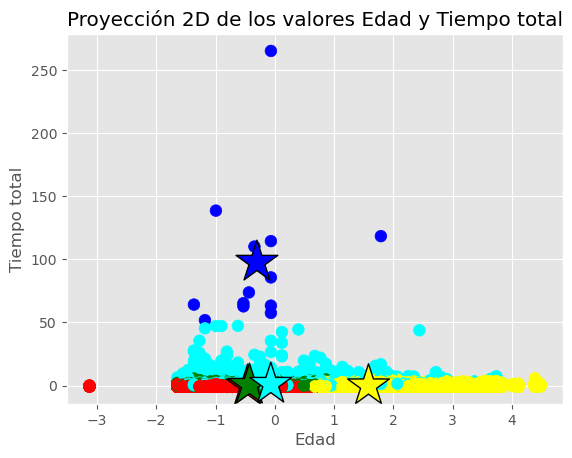

In [53]:
#Proyección a 2D con 'edad' y 'tiempo_total'
f1 = data_cluster['edad'].values
f3 = data_cluster['tiempo_total'].values

#Gráfico de Proyección 2D
plt.scatter(f1, f3, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 2], marker = '*', edgecolor='black', linewidth=1, c = colores, s = 1000)
plt.xlabel("Edad")
plt.ylabel("Tiempo total")
plt.title("Proyección 2D de los valores Edad y Tiempo total")
plt.savefig('./Imagenes/grafico2D_2.png')
plt.show();

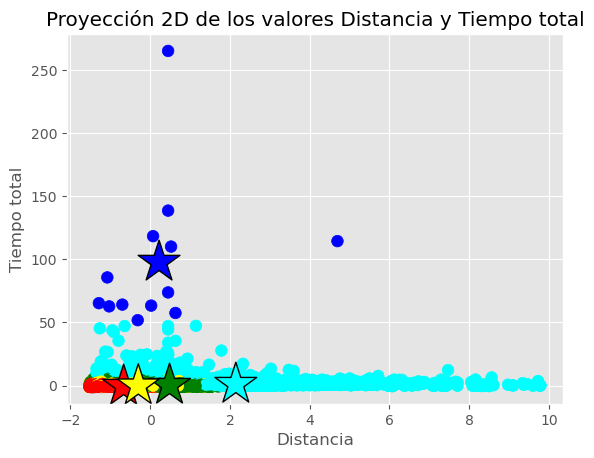

In [54]:
#Proyección a 2D con 'googlemaps_dis' y 'tiempo_total'
f2 = data_cluster['googlemaps_dis'].values
f3 = data_cluster['tiempo_total'].values

#Gráfico de Proyección 2D
plt.scatter(f2, f3, c = asignar, s = 70)
plt.scatter(C[:, 1], C[:, 2], marker = '*', edgecolor='black', linewidth=1, c = colores, s = 1000)
plt.xlabel("Distancia")
plt.ylabel("Tiempo total")
plt.title("Proyección 2D de los valores Distancia y Tiempo total")
plt.savefig('./Imagenes/grafico2D_3.png')
plt.show();

In [63]:
#Copia de los Usuarios junto con su respectivo Clúster (label)
copy = pd.DataFrame()
copy['id'] = data_cluster.index.values
copy['genero'] = data_cluster['genero'].values
copy['label'] = labels;

#Conteo de Usuarios por cada Clúster (label)
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = ['rojo', 'verde', 'azul', 'cyan', 'amarillo']
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo['porcentaje'] = round(cantidadGrupo['cantidad']/cantidadGrupo['cantidad'].sum()*100, 4)

#Impresión de los Resultados
print("Cantidad y porcentaje de usuarios en cada clúster:")
cantidadGrupo.to_csv('./Datos/MiBici/cantidadGrupo.csv')
display(cantidadGrupo)

Cantidad y porcentaje de usuarios en cada clúster:


,color,cantidad,porcentaje
0,rojo,158762,42.3736
1,verde,103127,27.5246
2,azul,13,0.0035
3,cyan,36972,9.8678
4,amarillo,75798,20.2305


In [45]:
contingency_table = pd.crosstab(copy['genero'], copy['label'], margins=True, margins_name="Total")
contingency_table

label,0,1,2,3,4,Total
genero,,,,,,
F,44937,29906,4,8640,13199,96686
M,113825,73221,9,28332,62599,277986
Total,158762,103127,13,36972,75798,374672


In [61]:
labels

array([3, 1, 1, ..., 0, 1, 4])